In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read raw CSV in while restricting to only columns of interest
columns = ['Class', 'Drug', 'written_at']
pdmp = pd.read_csv("pdmp_full.csv", usecols=columns)

In [22]:
pdmp.head()

,written_at,Class,Drug
0,2014-03-17,Stimulant,Dexmethylphenidate
1,2014-01-18,Stimulant,Dexmethylphenidate
2,2016-05-13,Stimulant,Dexmethylphenidate
3,2016-03-14,Stimulant,Dexmethylphenidate
4,2016-02-09,Stimulant,Dexmethylphenidate


In [23]:
pdmp.dtypes

written_at    object
Class         object
Drug          object
dtype: object

In [24]:
pdmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28998307 entries, 0 to 28998306
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   written_at  object
 1   Class       object
 2   Drug        object
dtypes: object(3)
memory usage: 663.7+ MB


In [25]:
pdmp.loc[11718792]

written_at    2016-10-28
Class              Benzo
Drug           Lorazepam
Name: 11718792, dtype: object

In [26]:
pdmp['Class'].astype('object').value_counts()

Opioid             15263147
Benzo               6559847
Misc                1881316
Stimulant           1366454
Muscle Relaxant      600889
Name: Class, dtype: int64

In [27]:
pdmp['Drug'].value_counts()

Hydrocodone SA        7120841
Tramadol SA           2962621
Alprazolam            2359323
Oxycodone SA          2310252
Zolpidem              1881316
Clonazepam            1669649
Lorazepam             1049756
Codeine                922024
Diazepam               825602
Amphetamine            728495
Carisoprodol           600776
Temazepam              493244
Morphine LA            351590
Buprenorphine          313840
Fentanyl LA            280100
Lisdexamfetamine       263808
Methylphenidate        207373
Methadone              194407
Oxycodone LA           179900
Morphine SA            176566
Dexmethylphenidate     152372
Hydromorphone SA       136731
Meperidine             119351
Triazolam               65448
Tapentadol SA           43127
Clorazepate             38993
Butorphanol             34801
Chlordiazepoxide        32446
Oxymorphone LA          25738
Pentazocine             22873
Tramadol LA             18880
Tapentadol LA           18109
Hydrocodone LA          15521
Dextroamph

In [40]:
# Create dataframe with coerced date column and quarters
df = pd.DataFrame(pdmp)
df['date'] = pd.to_datetime(df['written_at'], format='%Y-%m-%d', errors='coerce')
df['quarter'] = pd.PeriodIndex(df.date, freq='Q')

In [41]:
d2017 = df[df.date.between('2017-01-01', '2017-12-31')]
d2017[d2017.Class=='Opioid']

,written_at,Class,Drug,date,quarter
29,2017-06-06,Opioid,Codeine,2017-06-06,2017Q2
48,2017-01-30,Opioid,Hydrocodone SA,2017-01-30,2017Q1
50,2017-02-15,Opioid,Hydrocodone SA,2017-02-15,2017Q1
63,2017-07-17,Opioid,Fentanyl LA,2017-07-17,2017Q3
64,2017-06-15,Opioid,Fentanyl LA,2017-06-15,2017Q2
...,...,...,...,...,...
28998219,2017-09-01,Opioid,Oxycodone SA,2017-09-01,2017Q3
28998220,2017-02-24,Opioid,Oxycodone SA,2017-02-24,2017Q1
28998221,2017-12-08,Opioid,Oxycodone SA,2017-12-08,2017Q4
28998231,2017-05-17,Opioid,Tramadol SA,2017-05-17,2017Q2


In [42]:
df2017 = df[df.date.between('2014-01-01', '2017-12-31')]
dfOpioids = df2017[df2017.Class=='Opioid']

In [43]:
dfOpioids

,written_at,Class,Drug,date,quarter
29,2017-06-06,Opioid,Codeine,2017-06-06,2017Q2
40,2015-05-14,Opioid,Tramadol SA,2015-05-14,2015Q2
41,2015-02-26,Opioid,Tramadol SA,2015-02-26,2015Q1
42,2014-04-14,Opioid,Hydrocodone SA,2014-04-14,2014Q2
43,2014-04-26,Opioid,Oxycodone SA,2014-04-26,2014Q2
...,...,...,...,...,...
28998248,2015-11-25,Opioid,Oxycodone SA,2015-11-25,2015Q4
28998252,2017-03-31,Opioid,Oxycodone SA,2017-03-31,2017Q1
28998267,2016-06-09,Opioid,Hydrocodone SA,2016-06-09,2016Q2
28998268,2016-11-12,Opioid,Hydrocodone SA,2016-11-12,2016Q4


In [44]:
df_counts = dfOpioids.pivot_table(index=['quarter'],
                               columns=['Drug'],
                               values=['written_at'], aggfunc='count')

<AxesSubplot:xlabel='quarter'>

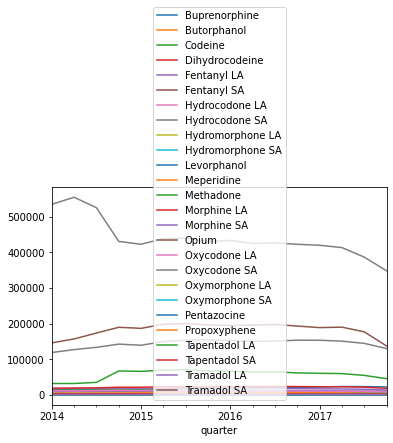

In [45]:
df_counts.columns = [x[1] for x in df_counts.columns]
df_counts.plot()

In [57]:
df_counts.to_json('drugs.json', orient='columns', indent=2)

In [46]:
df_counts

,Buprenorphine,Butorphanol,Codeine,Dihydrocodeine,Fentanyl LA,Fentanyl SA,Hydrocodone LA,Hydrocodone SA,Hydromorphone LA,Hydromorphone SA,...,Oxycodone LA,Oxycodone SA,Oxymorphone LA,Oxymorphone SA,Pentazocine,Propoxyphene,Tapentadol LA,Tapentadol SA,Tramadol LA,Tramadol SA
quarter,,,,,,,,,,,,,,,,,,,,,
2014Q1,16171.0,1994.0,31981.0,87.0,16501.0,333.0,3.0,534614.0,382.0,7824.0,...,11275.0,118861.0,1333.0,297.0,1700.0,NaN,745.0,3048.0,982.0,145927.0
2014Q2,16030.0,2102.0,32017.0,44.0,17347.0,384.0,37.0,554422.0,359.0,8300.0,...,11704.0,127090.0,1535.0,331.0,1779.0,NaN,877.0,3190.0,1082.0,156994.0
2014Q3,16715.0,2200.0,35238.0,36.0,17618.0,399.0,64.0,524985.0,312.0,8608.0,...,12046.0,133475.0,1589.0,340.0,1694.0,1.0,881.0,3171.0,1034.0,173584.0
2014Q4,17245.0,2224.0,67129.0,57.0,18419.0,382.0,113.0,430483.0,301.0,9063.0,...,13156.0,142468.0,1649.0,334.0,2019.0,NaN,967.0,3229.0,1128.0,189705.0
2015Q1,16704.0,2207.0,65979.0,204.0,17575.0,359.0,202.0,422593.0,249.0,8627.0,...,12240.0,139261.0,1504.0,262.0,1689.0,1.0,978.0,2927.0,1148.0,186659.0
2015Q2,17805.0,2286.0,69505.0,228.0,18292.0,332.0,266.0,438696.0,265.0,8966.0,...,12436.0,149747.0,1684.0,289.0,1493.0,NaN,1063.0,2959.0,1137.0,198294.0
2015Q3,19096.0,2263.0,70662.0,192.0,19103.0,315.0,255.0,439378.0,222.0,8842.0,...,12123.0,153315.0,1816.0,350.0,1520.0,NaN,1052.0,2811.0,1048.0,199982.0
2015Q4,19356.0,2322.0,67607.0,165.0,18872.0,241.0,292.0,430203.0,225.0,9092.0,...,11980.0,154681.0,1860.0,429.0,1596.0,NaN,1128.0,2789.0,1155.0,196254.0
2016Q1,19463.0,2224.0,66372.0,204.0,18467.0,155.0,341.0,433253.0,206.0,8764.0,...,11605.0,152740.0,1826.0,397.0,1313.0,NaN,1161.0,2766.0,1153.0,194889.0


In [51]:
df_counts.head()

,Buprenorphine,Butorphanol,Codeine,Dihydrocodeine,Fentanyl LA,Fentanyl SA,Hydrocodone LA,Hydrocodone SA,Hydromorphone LA,Hydromorphone SA,...,Oxycodone LA,Oxycodone SA,Oxymorphone LA,Oxymorphone SA,Pentazocine,Propoxyphene,Tapentadol LA,Tapentadol SA,Tramadol LA,Tramadol SA
quarter,,,,,,,,,,,,,,,,,,,,,
2014Q1,16171.0,1994.0,31981.0,87.0,16501.0,333.0,3.0,534614.0,382.0,7824.0,...,11275.0,118861.0,1333.0,297.0,1700.0,NaN,745.0,3048.0,982.0,145927.0
2014Q2,16030.0,2102.0,32017.0,44.0,17347.0,384.0,37.0,554422.0,359.0,8300.0,...,11704.0,127090.0,1535.0,331.0,1779.0,NaN,877.0,3190.0,1082.0,156994.0
2014Q3,16715.0,2200.0,35238.0,36.0,17618.0,399.0,64.0,524985.0,312.0,8608.0,...,12046.0,133475.0,1589.0,340.0,1694.0,1.0,881.0,3171.0,1034.0,173584.0
2014Q4,17245.0,2224.0,67129.0,57.0,18419.0,382.0,113.0,430483.0,301.0,9063.0,...,13156.0,142468.0,1649.0,334.0,2019.0,NaN,967.0,3229.0,1128.0,189705.0
2015Q1,16704.0,2207.0,65979.0,204.0,17575.0,359.0,202.0,422593.0,249.0,8627.0,...,12240.0,139261.0,1504.0,262.0,1689.0,1.0,978.0,2927.0,1148.0,186659.0


In [68]:
topO = dfOpioids['Drug'].groupby(dfOpioids['quarter'])

In [135]:
topO.value_counts()

quarter  Drug            
2014Q1   Hydrocodone SA      534614
         Tramadol SA         145927
         Oxycodone SA        118861
         Codeine              31981
         Morphine LA          18921
                              ...  
2017Q4   Hydromorphone LA       204
         Dihydrocodeine         103
         Fentanyl SA             35
         Levorphanol             17
         Opium                   13
Name: Drug, Length: 403, dtype: int64

In [136]:
s = topO.value_counts()
qdrugs = s.groupby(['Drug', 'quarter']).nlargest(2)

In [138]:
topO.nlargest(2)

TypeError: Cannot use method 'nlargest' with dtype object

In [111]:
qdf = qdrugs.to_frame()

In [178]:
qdfTrim = qdf.groupby(level=0).apply(lambda grp: grp.nlargest(8, 'Count'))

In [142]:
qdf.reset_index(inplace=True)

ValueError: cannot insert Drug, already exists

In [143]:
qdf.rename(columns={'Drug':'Count'}, inplace=True)

In [144]:
qdf.head(15)

Count
quarter Drug                    
2014Q1  Hydrocodone SA    534614
        Tramadol SA       145927
        Oxycodone SA      118861
        Codeine            31981
        Morphine LA        18921
        Fentanyl LA        16501
        Buprenorphine      16171
        Methadone          13094
        Oxycodone LA       11275
        Morphine SA        10451
        Meperidine          8294
        Hydromorphone SA    7824
        Tapentadol SA       3048
        Butorphanol         1994
        Pentazocine         1700

In [179]:
df_counts = qdfTrim.pivot_table(index=['quarter'],
                               columns=['Drug'],
                               values=['Count'],
                               aggfunc='sum')

<AxesSubplot:xlabel='quarter'>

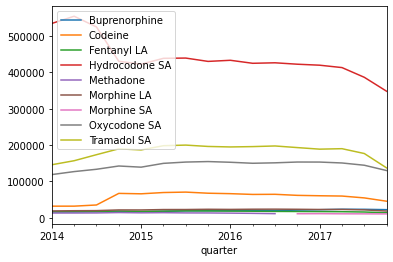

In [180]:
df_counts.columns = [x[1] for x in df_counts.columns]
df_counts.plot()

In [181]:
df_counts.to_json('drugs2.json', orient='columns', indent=2)

In [162]:
df_counts

Count                                                   \
Drug    Buprenorphine  Codeine Hydrocodone SA Morphine LA Oxycodone SA   
quarter                                                                  
2014Q1            NaN  31981.0       534614.0     18921.0     118861.0   
2014Q2            NaN  32017.0       554422.0     19454.0     127090.0   
2014Q3            NaN  35238.0       524985.0     19759.0     133475.0   
2014Q4            NaN  67129.0       430483.0     21612.0     142468.0   
2015Q1            NaN  65979.0       422593.0     21558.0     139261.0   
2015Q2            NaN  69505.0       438696.0     22651.0     149747.0   
2015Q3            NaN  70662.0       439378.0     22733.0     153315.0   
2015Q4            NaN  67607.0       430203.0     23413.0     154681.0   
2016Q1            NaN  66372.0       433253.0     23042.0     152740.0   
2016Q2            NaN  64265.0       424995.0     23592.0     149985.0   
2016Q3            NaN  64595.0       426366.0     23745.0     151222.0   
2016Q4            NaN  61720.0       422470.0     23404.0     153394.0   
2017Q1            NaN  60625.0       419749.0     22866.0     153297.0   
2017Q2        23487.0  59807.0       413196.0         NaN     150796.0   
2017Q3        23328.0  54706.0       386469.0         NaN     144560.0   
2017Q4        22370.0  45596.0       348080.0         NaN     129947.0   

                     
Drug    Tramadol SA  
quarter              
2014Q1     145927.0  
2014Q2     156994.0  
2014Q3     173584.0  
2014Q4     189705.0  
2015Q1     186659.0  
2015Q2     198294.0  
2015Q3     199982.0  
2015Q4     196254.0  
2016Q1     194889.0  
2016Q2     195833.0  
2016Q3     197577.0  
2016Q4     193128.0  
2017Q1     188798.0  
2017Q2     190100.0  
2017Q3     176793.0  
2017Q4     137184.0